# Parte 1 — EDA y Preparación de Datos

📊 **Parte 1 — EDA y Preparación de Datos**

### 🎯 **Objetivo**
Explorar el conjunto de datos, aplicar los filtros designados y preparar los datos para la fase de modelado.

### 🔹 **Pasos Sugeridos**
1.  **Cargar el dataset original de Properati**.
2.  **Filtrar** las propiedades según los siguientes criterios:
    *   `country_name = "Argentina"`
    *   `operation_type = "Venta"`
    *   `currency = "USD"`
    *   Zonas: **CABA** y **GBA** (pueden subdividir si lo desean).
3.  **Explorar variables relevantes**:
    *   Superficie (`surface_total`, `surface_covered`)
    *   Ambientes, dormitorios, baños
    *   Ubicación (`place_name`, `state_name`, `lat`, `lon`)
    *   Tipo de propiedad (`property_type`)
    *   Precio (`price_usd`)
4.  **Limpieza y tratamiento de datos**:
    *   Gestionar valores duplicados y nulos irrelevantes.
    *   Decidir **qué variables conservar** para el modelo.
    *   Imputar valores faltantes (si corresponde).
    *   Detectar y manejar **outliers** (ej. establecer límites razonables de superficie/precio).
5.  **Generar un dataset limpio final** y guardarlo como `data/processed.csv`.

> 💡 **Nota:** Se evaluará el criterio de limpieza y el razonamiento detrás de cada decisión. No es necesario que todos apliquen los mismos filtros.

### 🔹 **Entregables de esta parte**
*   **Conclusiones de negocio:** Presentar conclusiones que sirvan para conocer los datos desde una perspectiva de negocio.
*   **Storytelling:** Las conclusiones deben estar apoyadas en una narrativa o storytelling que guíe el análisis.
*   **Código y comentarios:** Mostrar el código utilizado para obtener la información, junto con comentarios que expliquen los pasos realizados.

## Librerías a importar

In [164]:
#Importo librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle



In [165]:
#!pip install funpymodeling

In [166]:

from funpymodeling.exploratory import status , freq_tbl

##Cargamos los datos

In [167]:
#Importar desde VS Code
#all_data= pd.read_csv('/home/chipa/TP8/test.csv', sep = ',')
#all_data.head(4)

In [168]:
#HABILITO IMPORTACION DESDE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:

df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP - GERIES 4/TP Final/dataset/properati.csv', sep = ',')

#Inspección inicial

Properati es un portal inmobiliario que reúne miles de publicaciones de propiedades en venta y alquiler en distintos países de Latinoamérica.

Revisamos el conjunto de datos antes de aplicar los filtros.

In [170]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,992192,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,450,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,153198,0.154404,0,0.000000,317046,float64
6,lon,152263,0.153461,0,0.000000,315745,float64
7,l1,0,0.000000,0,0.000000,4,object
8,l2,0,0.000000,0,0.000000,42,object
9,l3,57455,0.057907,0,0.000000,1262,object


In [171]:
df.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [172]:
df.shape

(992192, 25)

In [173]:
df.dtypes

,0
id,int64
ad_type,object
start_date,object
end_date,object
created_on,object
lat,float64
lon,float64
l1,object
l2,object
l3,object


In [174]:
print("Resumen de inspección inicial:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print(f"Hay {df.duplicated().sum()} filas duplicadas")
print(f"Verifico si las columnas tienen nulos")
print(f"{df.isna().sum()}")

Resumen de inspección inicial:
Número de filas: 992192
Número de columnas: 25
Hay 0 filas duplicadas
Verifico si las columnas tienen nulos
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                153198
lon                152263
l1                      0
l2                      0
l3                  57455
l4                 766797
l5                 987481
l6                 992192
rooms              489147
bedrooms           601493
bathrooms          219171
surface_total      544028
surface_covered    555231
currency            47251
price_period       622253
title                  28
description            22
property_type           0
operation_type          0
price               44381
dtype: int64


In [175]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

In [176]:
#Reviso las columnas que no tienen un nombre descriptivo:
print(df["l1"].dropna().unique()) # país / country_name
print(df["l2"].dropna().unique()) #Zona / Provincia / state_name
print(df["l3"].dropna().unique()) #Barrio
print(df["l4"].dropna().unique())#lugar
print(df["l5"].dropna().unique()) #lugar
print(df["l6"].dropna().unique())

['Argentina' 'Uruguay' 'Estados Unidos' 'Brasil']
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Interior'
 'Córdoba' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Tucumán'
 'Buenos Aires Costa Atlántica' 'Maldonado' 'San Luis' 'Neuquén'
 'Bs.As. G.B.A. Zona Oeste' 'Entre Ríos' 'Montevideo' 'Mendoza' 'Misiones'
 'Río Negro' 'Tierra Del Fuego' 'Pennsylvania' 'Chubut' 'Corrientes'
 'Salta' 'La Rioja' 'La Pampa' 'Chaco' 'San Juan' 'Rocha' 'Jujuy'
 'Maryland' 'Canelones' 'Santa Catarina' 'Colonia' 'Florida' 'Santa Cruz'
 'Michigan' 'Miami' 'Santiago Del Estero' 'Rio de Janeiro' 'Formosa'
 'Catamarca' 'Rio Grande do Norte' 'São Paulo']
['Colegiales' 'Almagro' 'Villa Urquiza' ... 'Santa Clara de Buena Vista'
 'Bella Italia' 'Saladero Mariano Cabal']
['Palermo Viejo' 'Villa Elisa' 'La Plata' 'Palermo Hollywood'
 'Palermo Soho' 'Haras del Sur I' 'Manuel B Gonnet' 'Palermo Chico'
 'City Bell' 'Tolosa' 'Villa Elvira' 'San Carlos' 'José Hernández'
 'Urquiza' 'Villa Ballester' 'Estancias del P

In [177]:
df["price"].dropna().unique()

array([ 259000.,  235500.,  175000., ...,  126750.,  674000., 1010101.])

In [178]:
# Genero una copia para trabajar
properati = df.copy()
properati.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

In [179]:
#Renombro variables que considero relevantes
properati.rename(
        columns = {
            'l1':'country_name',
            'l2':'state_name',#Zonas
            'l3':'place_name' #Barrio
            },
    inplace = True)

properati.columns
#l4, l5 y l6 no las voy a utilizar.

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'country_name', 'state_name', 'place_name', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type', 'price'],
      dtype='object')

In [180]:
#Verifico que nombrara correctamente las columnas
print(properati['country_name'].dropna().unique())
print(properati['operation_type'].dropna().unique())
print(properati['currency'].dropna().unique())
print(properati['state_name'].dropna().unique())

['Argentina' 'Uruguay' 'Estados Unidos' 'Brasil']
['Venta' 'Alquiler' 'Alquiler temporal']
['USD' 'ARS' 'UYU' 'PEN']
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Interior'
 'Córdoba' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Tucumán'
 'Buenos Aires Costa Atlántica' 'Maldonado' 'San Luis' 'Neuquén'
 'Bs.As. G.B.A. Zona Oeste' 'Entre Ríos' 'Montevideo' 'Mendoza' 'Misiones'
 'Río Negro' 'Tierra Del Fuego' 'Pennsylvania' 'Chubut' 'Corrientes'
 'Salta' 'La Rioja' 'La Pampa' 'Chaco' 'San Juan' 'Rocha' 'Jujuy'
 'Maryland' 'Canelones' 'Santa Catarina' 'Colonia' 'Florida' 'Santa Cruz'
 'Michigan' 'Miami' 'Santiago Del Estero' 'Rio de Janeiro' 'Formosa'
 'Catamarca' 'Rio Grande do Norte' 'São Paulo']


### 🔹 **Pasos Sugeridos**
  **Filtrar** las propiedades según los siguientes criterios:
    *   `country_name = "Argentina"`
    *   `operation_type = "Venta"`
    *   `currency = "USD"`
    *   Zonas: **CABA** y **GBA** (pueden subdividir si lo desean).

In [181]:
#Genero zonas a filtrar:
zonas_filtrar = [
    'Capital Federal',
    'Bs.As. G.B.A. Zona Sur',
    'Bs.As. G.B.A. Zona Norte',
    'Bs.As. G.B.A. Zona Oeste'
]

In [182]:
# Filtrar las propiedades según los criterios informados:

properati = properati[
    (properati['country_name'] == 'Argentina') &
    (properati['operation_type'] == 'Venta') &
    (properati['currency'] == 'USD') &
    (properati['state_name'].isin(zonas_filtrar))
]

In [183]:
properati = properati.rename(columns={'price': 'price_usd'})

In [184]:
print(properati['country_name'].dropna().unique())
print(properati['operation_type'].dropna().unique())
print(properati['currency'].dropna().unique())
print(properati['state_name'].dropna().unique())


['Argentina']
['Venta']
['USD']
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']


# Análisis Exploratorio de Datos (EDA)

In [185]:
status(properati)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,394641,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,448,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,63164,0.160054,0,0.000000,137100,float64
6,lon,62718,0.158924,0,0.000000,136792,float64
7,country_name,0,0.000000,0,0.000000,1,object
8,state_name,0,0.000000,0,0.000000,4,object
9,place_name,21401,0.054229,0,0.000000,90,object


In [186]:
#Resumen estadístico
properati.describe(include='all')

,id,ad_type,start_date,end_date,created_on,lat,lon,country_name,state_name,place_name,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price_usd
count,394641.000000,394641,394641,394641,394641,331477.000000,331923.000000,394641,394641,373240,...,315319.000000,205906.000000,2.004870e+05,394641,131236,394630,394639,394641,394641,3.946410e+05
unique,NaN,1,346,448,346,NaN,NaN,1,4,90,...,NaN,NaN,NaN,1,1,180529,268294,10,1,NaN
top,NaN,Propiedad,2020-03-21,9999-12-31,2020-03-21,NaN,NaN,Argentina,Capital Federal,La Plata,...,NaN,NaN,NaN,USD,Mensual,Departamento de 2 ambientes en Venta en Villa ...,Hermoso monoambiente al frente con balcon ater...,Departamento,Venta,NaN
freq,NaN,394641,7398,97747,7398,NaN,NaN,394641,169054,26376,...,NaN,NaN,NaN,394641,131236,1550,334,160160,394641,NaN
mean,503652.978842,NaN,NaN,NaN,NaN,-58.495837,-34.620055,NaN,NaN,NaN,...,1.733375,396.662545,1.820329e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.571602e+05
std,293038.142954,NaN,NaN,NaN,NaN,0.622537,0.551476,NaN,NaN,NaN,...,1.067954,3220.737320,3.428369e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.387785e+05
min,3.000000,NaN,NaN,NaN,NaN,-180.000000,-53.788249,NaN,NaN,NaN,...,1.000000,-200.000000,-1.700000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,247882.000000,NaN,NaN,NaN,NaN,-58.570656,-34.670820,NaN,NaN,NaN,...,1.000000,54.000000,4.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+04
50%,507641.000000,NaN,NaN,NaN,NaN,-58.447846,-34.608560,NaN,NaN,NaN,...,1.000000,100.000000,7.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+05
75%,758348.000000,NaN,NaN,NaN,NaN,-58.398084,-34.574227,NaN,NaN,NaN,...,2.000000,258.000000,1.550000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.750000e+05


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'lon'}>],
       [<Axes: title={'center': 'l6'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'surface_total'}>,
        <Axes: title={'center': 'surface_covered'}>],
       [<Axes: title={'center': 'price_usd'}>, <Axes: >, <Axes: >]],
      dtype=object)

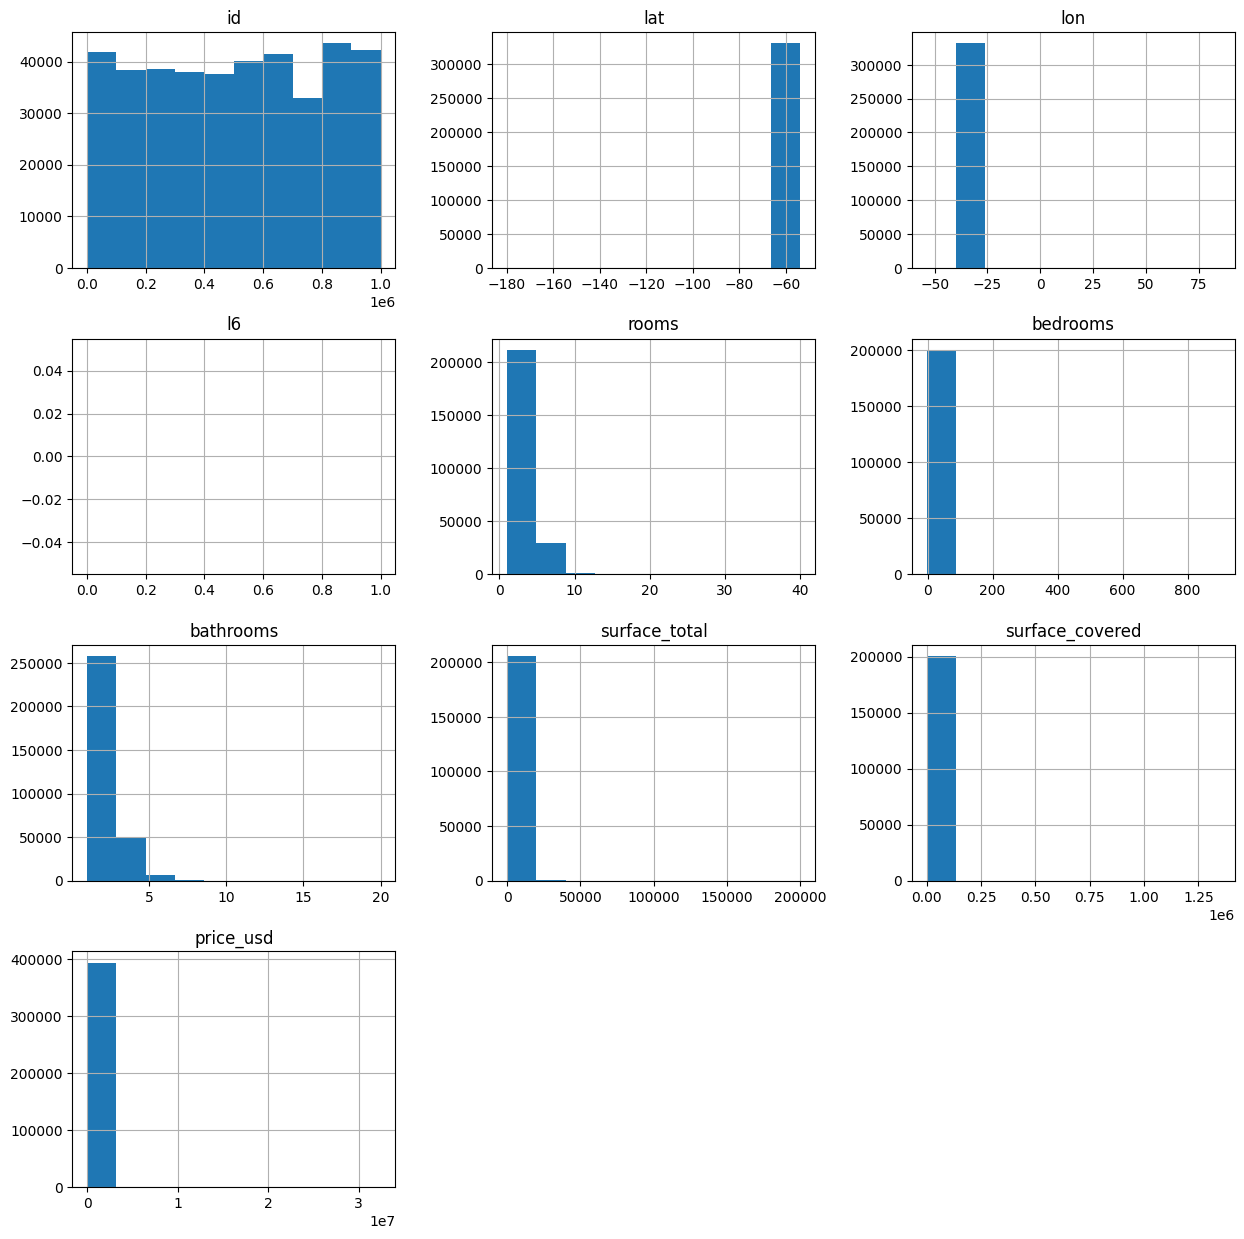

In [187]:
properati.hist(figsize = (15,15))

  **Explorar variables relevantes**:
  
    *   Superficie (`surface_total`, `surface_covered`)
    *   Ambientes, dormitorios, baños
    *   Ubicación (`place_name`, `state_name`, `lat`, `lon`)
    *   Tipo de propiedad (`property_type`)
    *   Precio (`price_usd`)

In [188]:
properati[['surface_total', 'surface_covered']].info()
properati[['surface_total', 'surface_covered']].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 394641 entries, 0 to 992186
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   surface_total    205906 non-null  float64
 1   surface_covered  200487 non-null  float64
dtypes: float64(2)
memory usage: 9.0 MB


,surface_total,surface_covered
count,205906.000000,2.004870e+05
mean,396.662545,1.820329e+02
std,3220.737320,3.428369e+03
min,-200.000000,-1.700000e+02
25%,54.000000,4.700000e+01
50%,100.000000,7.800000e+01
75%,258.000000,1.550000e+02
max,200000.000000,1.350000e+06


In [189]:
#Cantidad de 0 en surface_total y surface_covered
valor0_sup = (properati[['surface_total', 'surface_covered']] == 0).sum()
print("Cantidad de 0:\n", valor0_sup)

Cantidad de 0:
 surface_total      84
surface_covered     0
dtype: int64


In [190]:
#Cuantos nulos surface_total y surface_covered
nulos_sup = properati[['surface_total', 'surface_covered']].isnull().sum()
print("Cantidad de nulos:",nulos_sup)

porcentaje_nulos = (nulos_sup / len(properati)) * 100

for col, pct in porcentaje_nulos.items():
    print(f"Porcentaje de nulos en {col}: {pct:.2f}%")

Cantidad de nulos: surface_total      188735
surface_covered    194154
dtype: int64
Porcentaje de nulos en surface_total: 47.82%
Porcentaje de nulos en surface_covered: 49.20%


surface_total y surface_covered tienen gran cantidad de nulos.


/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


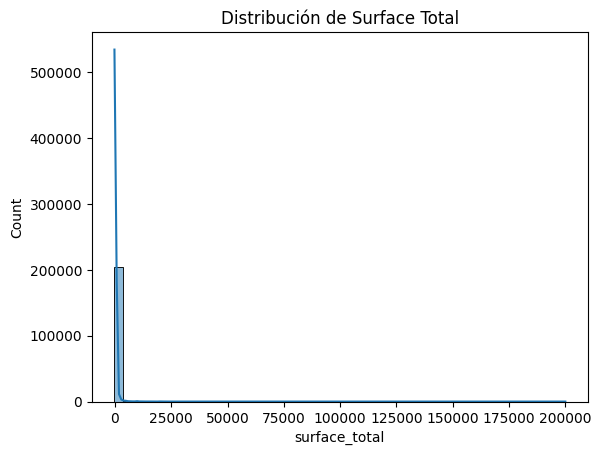

/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


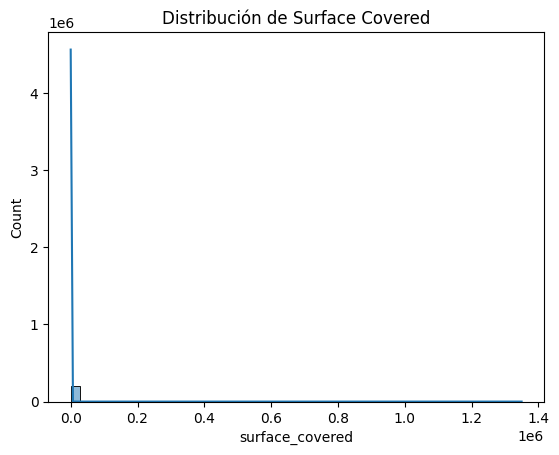

In [191]:
sns.histplot(properati['surface_total'], bins=50, kde=True)
plt.title('Distribución de Surface Total')
plt.show()

sns.histplot(properati['surface_covered'], bins=50, kde=True)
plt.title('Distribución de Surface Covered')
plt.show()

In [192]:
import matplotlib.pyplot as plt

# Filtrar filas SIN nulos y SIN ceros en ambas columnas
properati_clean = properati[
    (properati['surface_total'].notnull()) &
    (properati['surface_covered'].notnull()) &
    (properati['surface_total'] > 0)
    #(properati['surface_covered'] > 0) Hay casos que pueden no tener sup cubierta
]

# Ver cuántas filas quedaron
print(f"Filas originales: {len(properati)}")
print(f"Filas después del filtrado: {len(properati_clean)}")



Filas originales: 394641
Filas después del filtrado: 181478


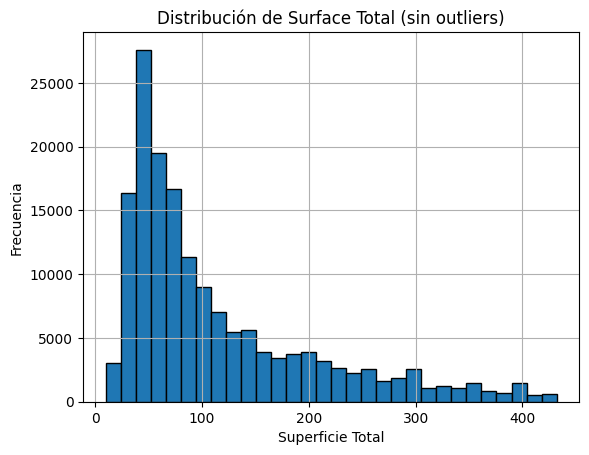

In [193]:
# Calcular IQR (rango intercuartílico) y filtrar outliers
Q1 = properati_clean['surface_total'].quantile(0.25)
Q3 = properati_clean['surface_total'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
properati_filtered = properati_clean[(properati_clean['surface_total'] >= (Q1 - 1.5 * IQR)) &
                                     (properati_clean['surface_total'] <= (Q3 + 1.5 * IQR))]

# Graficar sin los outliers
properati_filtered['surface_total'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Surface Total (sin outliers)')
plt.xlabel('Superficie Total')
plt.ylabel('Frecuencia')
plt.show()


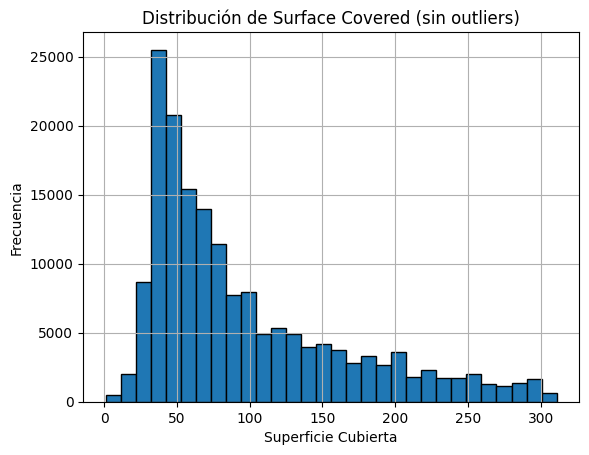

In [194]:
# Calcular IQR (rango intercuartílico) y filtrar outliers
Q1 = properati_clean['surface_covered'].quantile(0.25)
Q3 = properati_clean['surface_covered'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
properati_filtered = properati_clean[(properati_clean['surface_covered'] >= (Q1 - 1.5 * IQR)) &
                                     (properati_clean['surface_covered'] <= (Q3 + 1.5 * IQR))]

# Graficar sin los outliers
properati_filtered['surface_covered'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Surface Covered (sin outliers)')
plt.xlabel('Superficie Cubierta')
plt.ylabel('Frecuencia')
plt.show()

In [195]:
# Calcular la mediana de ambas superficies
mediana_surface_tot = properati_filtered['surface_total'].median()
print(f"Mediana de 'surface_total' (sin outliers): {mediana_surface_tot:.2f}")

mediana_surface_cov = properati_filtered['surface_covered'].median()
print(f"Mediana de 'surface_covered' (sin outliers): {mediana_surface_cov:.2f}")

Mediana de 'surface_total' (sin outliers): 82.00
Mediana de 'surface_covered' (sin outliers): 71.00


In [196]:
#verifico que tipo de propiedad es más frecuente
freq_tbl(properati['property_type'])

,property_type,frequency,percentage,cumulative_perc
0,Departamento,160160,0.405837,0.405837
1,Casa,87088,0.220677,0.626514
2,Otro,62817,0.159175,0.785689
3,Lote,36081,0.091427,0.877116
4,PH,20387,0.051660,0.928776
5,Local comercial,10604,0.026870,0.955646
6,Oficina,8295,0.021019,0.976665
7,Cochera,5729,0.014517,0.991182
8,Depósito,2682,0.006796,0.997978
9,Casa de campo,798,0.002022,1.000000


El departamento concentra el 41% de las propiedades en venta, mientras que las casas representan el 22% del total de las propiedades.

In [197]:
freq_tbl(properati)

     ad_type  frequency  percentage  cumulative_perc
0  Propiedad     394641         1.0              1.0

----------------------------------------------------------------

     start_date  frequency  percentage  cumulative_perc
0    2020-03-21       7398    0.018746         0.018746
1    2019-08-01       6226    0.015776         0.034523
2    2020-02-27       6165    0.015622         0.050144
3    2020-04-08       5252    0.013308         0.063453
4    2020-04-10       4498    0.011398         0.074850
..          ...        ...         ...              ...
341  2019-10-06         62    0.000157         0.999716
342  2019-08-04         36    0.000091         0.999807
343  2019-09-08         31    0.000079         0.999886
344  2019-09-15         24    0.000061         0.999947
345  2019-09-29         21    0.000053         1.000000

[346 rows x 4 columns]

----------------------------------------------------------------

       end_date  frequency  percentage  cumulative_perc
0    999

In [198]:
properati[['surface_total', 'surface_covered']].isna().groupby(df['property_type']).mean()


,surface_total,surface_covered
property_type,,
Casa,0.442254,0.365722
Casa de campo,0.456140,0.412281
Cochera,0.667132,0.749869
Departamento,0.345935,0.315235
Depósito,0.392990,0.403430
Local comercial,0.345436,0.308374
Lote,0.460547,0.956903
Oficina,0.289331,0.274382
Otro,0.960775,0.958005


In [199]:
# porcentajes de nulos
nulls_by_type = properati.groupby('property_type')[['surface_total', 'surface_covered']].apply(lambda x: x.isna().sum())

total_by_type = properati['property_type'].value_counts()

summary = pd.DataFrame({
    'total_props': total_by_type,
    'null_surface_total': nulls_by_type['surface_total'],
    'null_surface_covered': nulls_by_type['surface_covered']
})

summary['pct_null_surface_total'] = (summary['null_surface_total'] / summary['total_props']) * 100
summary['pct_null_surface_covered'] = (summary['null_surface_covered'] / summary['total_props']) * 100

summary = summary.sort_values('pct_null_surface_total', ascending=False)
summary


,total_props,null_surface_total,null_surface_covered,pct_null_surface_total,pct_null_surface_covered
property_type,,,,,
Otro,62817,60353,60179,96.077495,95.800500
Cochera,5729,3822,4296,66.713213,74.986909
Lote,36081,16617,34526,46.054710,95.690252
Casa de campo,798,364,329,45.614035,41.228070
Casa,87088,38515,31850,44.225381,36.572203
Depósito,2682,1054,1082,39.299031,40.343028
Departamento,160160,55405,50488,34.593531,31.523477
Local comercial,10604,3663,3270,34.543568,30.837420
PH,20387,6542,5858,32.089076,28.733997


In [200]:
properati.groupby('property_type')['surface_total'].mean()

,surface_total
property_type,
Casa,513.656414
Casa de campo,4272.728111
Cochera,61.276875
Departamento,94.080216
Depósito,1238.581081
Local comercial,300.260193
Lote,1547.835132
Oficina,209.917048
Otro,2972.722403


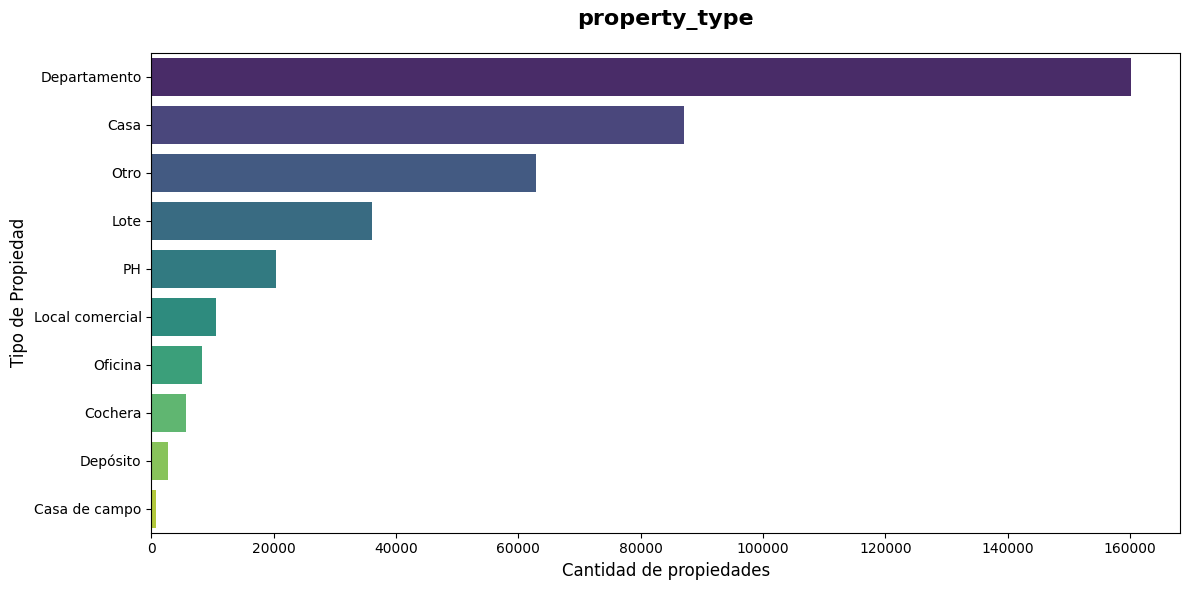

In [201]:
plt.figure(figsize=(12,6))

sns.countplot(y=properati['property_type'],
              order = properati['property_type'].value_counts().index,
              palette='viridis')

plt.title('property_type',
          fontsize=16,
          fontweight='bold',
          pad=20)

plt.xlabel('Cantidad de propiedades', fontsize=12)
plt.ylabel('Tipo de Propiedad', fontsize=12)

plt.tight_layout()
plt.show()

In [202]:
# Analizo price_usd

print(f"Valores nulos en price_usd: {properati['price_usd'].isna().sum()}")
print(properati['price_usd'].describe())

Valores nulos en price_usd: 0
count    3.946410e+05
mean     2.571602e+05
std      4.387785e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.500000e+05
75%      2.750000e+05
max      3.243423e+07
Name: price_usd, dtype: float64


/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


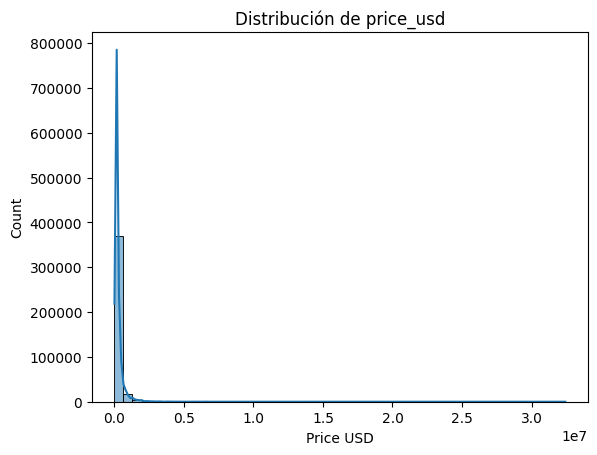

In [203]:
# Histograma
sns.histplot(properati['price_usd'], bins=50, kde=True)
plt.title('Distribución de price_usd')
plt.xlabel('Price USD')
plt.show()

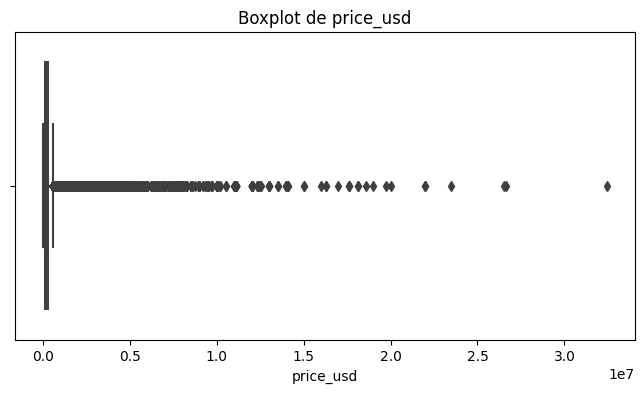

In [204]:
plt.figure(figsize=(8,4))
sns.boxplot(x=properati['price_usd'].dropna())
plt.title('Boxplot de price_usd')
plt.show()

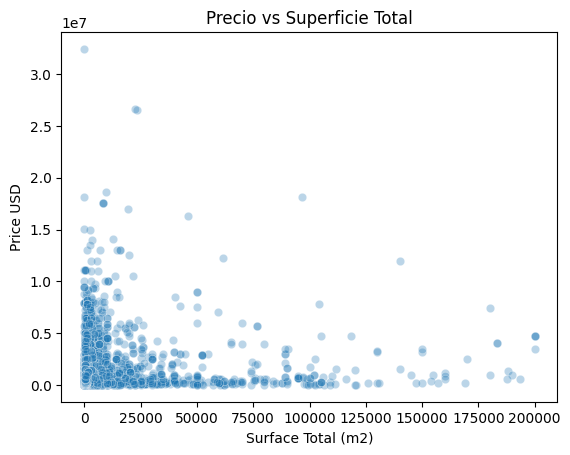

In [205]:
sns.scatterplot(data=properati, x='surface_total', y='price_usd', alpha=0.3)
plt.title('Precio vs Superficie Total')
plt.xlabel('Surface Total (m2)')
plt.ylabel('Price USD')
plt.show()


In [206]:
properati["price_usd"].dropna().unique()

array([259000., 235500., 175000., ..., 411500., 306800., 674000.])

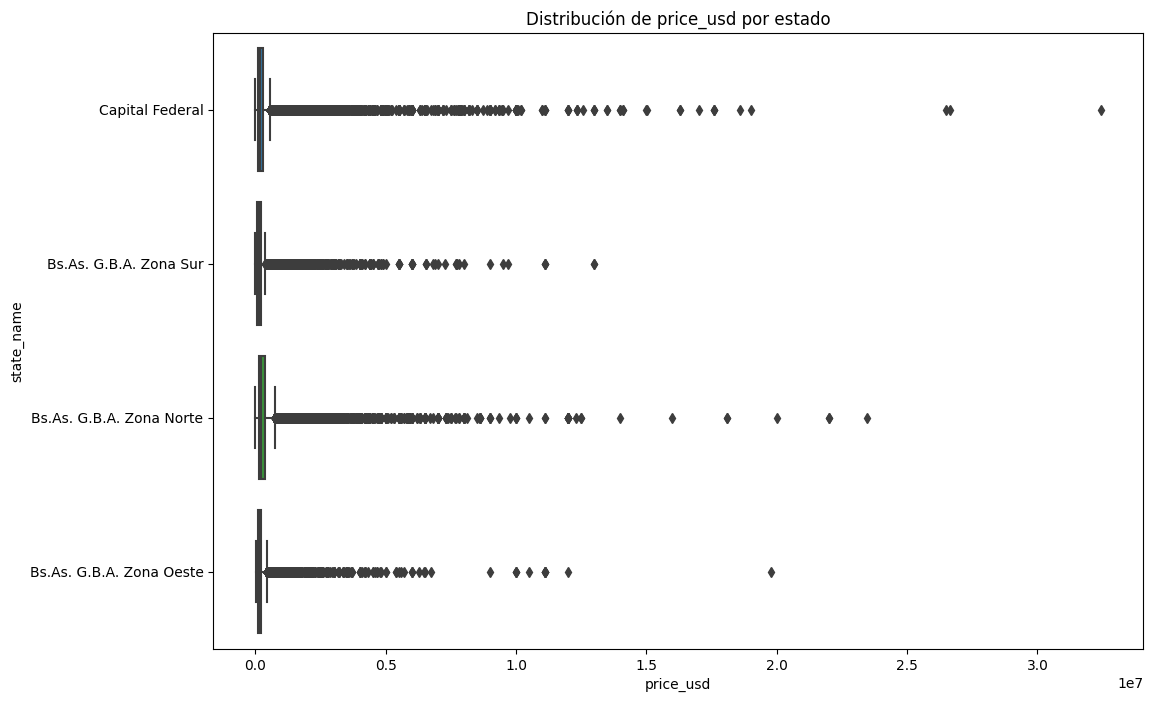

In [207]:
df_clean = properati.dropna(subset=['price_usd', 'state_name'])

plt.figure(figsize=(12,8))
sns.boxplot(data=df_clean, y='state_name', x='price_usd')
plt.title('Distribución de price_usd por estado')
plt.show()


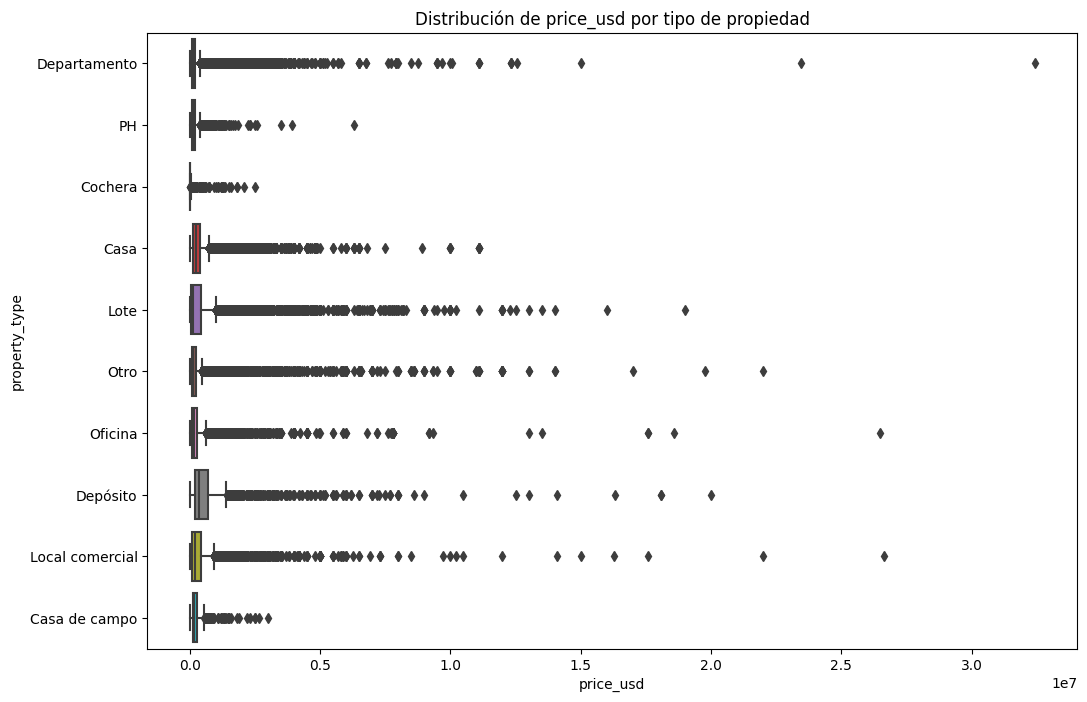

In [208]:
df_clean = properati.dropna(subset=['price_usd', 'property_type'])

plt.figure(figsize=(12,8))
sns.boxplot(data=df_clean, y='property_type', x='price_usd')
plt.title('Distribución de price_usd por tipo de propiedad')
plt.show()

In [209]:
Q_por_estado = properati.groupby('state_name')['id'].count()
Q_por_estado

,id
state_name,
Bs.As. G.B.A. Zona Norte,85377
Bs.As. G.B.A. Zona Oeste,55252
Bs.As. G.B.A. Zona Sur,84958
Capital Federal,169054


In [210]:
Q_por_estado = (
    properati.groupby('state_name')['id']
    .count()
    .reset_index(name='cantidad')
)

# Calcular el porcentaje del total
Q_por_estado['porcentaje'] = (Q_por_estado['cantidad'] / Q_por_estado['cantidad'].sum()) * 100

# Redondeamos para mejor lectura
Q_por_estado['porcentaje'] = Q_por_estado['porcentaje'].round(2)

print(Q_por_estado)


                 state_name  cantidad  porcentaje
0  Bs.As. G.B.A. Zona Norte     85377       21.63
1  Bs.As. G.B.A. Zona Oeste     55252       14.00
2    Bs.As. G.B.A. Zona Sur     84958       21.53
3           Capital Federal    169054       42.84


In [211]:
# Ver cantidad de nulos
print("Nulos por variable:")
print(properati[['rooms', 'bedrooms', 'bathrooms']].isna().sum())

# Estadísticas básicas
print("Estadísticas descriptivas:")
print(properati[['rooms', 'bedrooms', 'bathrooms']].describe())


Nulos por variable:
rooms        152224
bedrooms     194501
bathrooms     79322
dtype: int64
Estadísticas descriptivas:
               rooms       bedrooms      bathrooms
count  242417.000000  200140.000000  315319.000000
mean        2.942941       2.157180       1.733375
std         1.580059       2.869628       1.067954
min         1.000000      -3.000000       1.000000
25%         2.000000       1.000000       1.000000
50%         3.000000       2.000000       1.000000
75%         4.000000       3.000000       2.000000
max        40.000000     900.000000      20.000000


/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


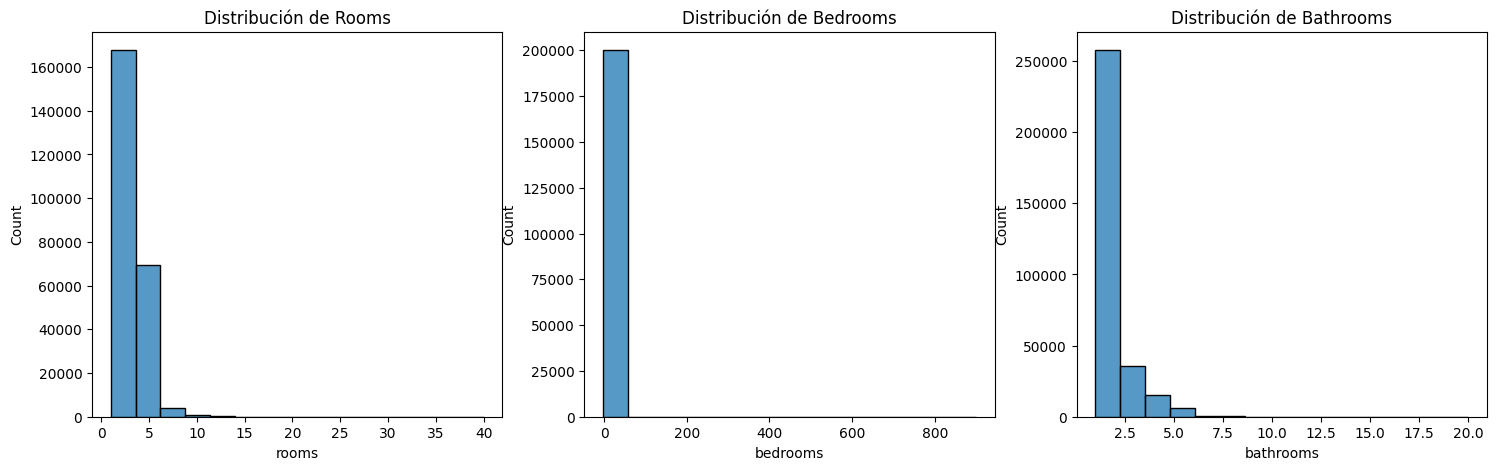

In [212]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(properati['rooms'].dropna(), bins=15, kde=False, ax=axes[0])
axes[0].set_title('Distribución de Rooms')

sns.histplot(properati['bedrooms'].dropna(), bins=15, kde=False, ax=axes[1])
axes[1].set_title('Distribución de Bedrooms')

sns.histplot(properati['bathrooms'].dropna(), bins=15, kde=False, ax=axes[2])
axes[2].set_title('Distribución de Bathrooms')

plt.show()


In [213]:
print("Nulos en lat y lon:")
print(properati[['lat', 'lon']].isna().sum())

print("\nRango de latitud y longitud:")
print(f"Latitud: {properati['lat'].min()} a {properati['lat'].max()}")
print(f"Longitud: {properati['lon'].min()} a {properati['lon'].max()}")


Nulos en lat y lon:
lat    63164
lon    62718
dtype: int64

Rango de latitud y longitud:
Latitud: -180.0 a -53.8285784574
Longitud: -53.788249 a 85.0511287798


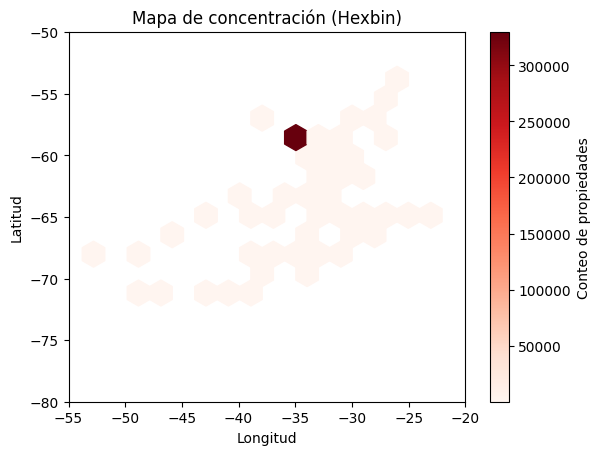

In [214]:
plt.hexbin(
    properati['lon'],
    properati['lat'],
    gridsize=70, cmap='Reds', mincnt=1
)

plt.xlim(-55, -20)
plt.ylim(-80, -50)

plt.colorbar(label='Conteo de propiedades')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de concentración (Hexbin)')
plt.show()

#Al haber filtrado el dataset por país y región, se observa una gran concentración de los casos.En una primera etapa no aporta mayor información, luego se puede analizar en mayor profundidad.

In [215]:
#Cantidades por tipo de propiedad / Zona
pd.crosstab(properati['property_type'], properati['state_name'])

state_name,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal
property_type,,,,
Casa,37061,15847,26738,7442
Casa de campo,236,321,236,5
Cochera,489,612,1651,2977
Departamento,21484,13271,25173,100232
Depósito,679,477,664,862
Local comercial,1641,1054,2074,5835
Lote,14158,3158,10040,8725
Oficina,1243,538,1302,5212
Otro,5972,16869,13635,26341


In [216]:
#Valores relativos por tipo de propiedad / Zona
pd.crosstab(properati['property_type'], properati['state_name'],normalize='index', margins=True)

state_name,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal
property_type,,,,
Casa,0.425558,0.181965,0.307023,0.085454
Casa de campo,0.295739,0.402256,0.295739,0.006266
Cochera,0.085355,0.106825,0.288183,0.519637
Departamento,0.134141,0.082861,0.157174,0.625824
Depósito,0.253169,0.177852,0.247576,0.321402
Local comercial,0.154753,0.099396,0.195587,0.550264
Lote,0.392395,0.087525,0.278263,0.241817
Oficina,0.149849,0.064858,0.156962,0.628330
Otro,0.095070,0.268542,0.217059,0.419329


In [217]:
properati.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'country_name', 'state_name', 'place_name', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type', 'price_usd'],
      dtype='object')

In [218]:
properati.groupby('property_type')['state_name'].describe()
# Casa: la mayoría se encuentra en Bs.As. G.B.A. Zona Norte
# Casa de campo: la mayoría se encuentra en Bs.As. G.B.A. Zona Oeste
# Cochera, Departamento, Depósito, Local, Oficina, y PH en Capital Federal

,count,unique,top,freq
property_type,,,,
Casa,87088,4,Bs.As. G.B.A. Zona Norte,37061
Casa de campo,798,4,Bs.As. G.B.A. Zona Oeste,321
Cochera,5729,4,Capital Federal,2977
Departamento,160160,4,Capital Federal,100232
Depósito,2682,4,Capital Federal,862
Local comercial,10604,4,Capital Federal,5835
Lote,36081,4,Bs.As. G.B.A. Zona Norte,14158
Oficina,8295,4,Capital Federal,5212
Otro,62817,4,Capital Federal,26341


In [219]:
#Analizo el precio por zona. Se observa que Bs.As. G.B.A. Zona Norte	tiene el mayor precio, es donde se encuentran mayor cantidad de casas
properati.groupby('state_name')['price_usd'].mean()

,price_usd
state_name,
Bs.As. G.B.A. Zona Norte,319794.687668
Bs.As. G.B.A. Zona Oeste,189011.257077
Bs.As. G.B.A. Zona Sur,182228.680395
Capital Federal,285457.946928


**Limpieza y tratamiento de datos**:
    *   Gestionar valores duplicados y nulos irrelevantes.
    *   Decidir **qué variables conservar** para el modelo.
    *   Imputar valores faltantes (si corresponde).
    *   Detectar y manejar **outliers** (ej. establecer límites razonables de superficie/precio).

In [220]:

# Anteriormente verificamos y no hay duplicados
print("Filas originales:", properati.shape[0])
duplicados = properati.duplicated()
print("Cantidad de filas duplicadas exactas:", duplicados.sum())


Filas originales: 394641
Cantidad de filas duplicadas exactas: 0


No hay registros completamente idénticos.
Voy a verificar que no existan duplicados en base a las columnas clave y a ubivación.

In [221]:
duplicados_parciales = properati.duplicated(subset=['state_name', 'place_name', 'property_type', 'surface_total','lat','lon'])
print("Duplicados según esas columnas:", duplicados_parciales.sum())

Duplicados según esas columnas: 195563


In [222]:
duplicados_df = properati[properati.duplicated(
    subset=['state_name', 'place_name', 'property_type', 'surface_total', 'lat', 'lon'],
    keep=False
)]

resumen_duplicados = (
    duplicados_df
    .groupby(['state_name', 'place_name', 'property_type', 'surface_total', 'lat', 'lon'])
    .size()
    .reset_index(name='cantidad')
    .sort_values(by='cantidad', ascending=False)
)

resumen_duplicados.head(5)




,state_name,place_name,property_type,surface_total,lat,lon,cantidad
14340,Capital Federal,Colegiales,Departamento,31.0,-58.455819,-34.579326,318
14345,Capital Federal,Colegiales,Departamento,32.0,-58.455819,-34.579326,255
10550,Capital Federal,Almagro,Departamento,52.0,-58.421008,-34.608248,197
14408,Capital Federal,Colegiales,Departamento,58.0,-58.455819,-34.579326,171
10435,Capital Federal,Almagro,Departamento,41.0,-58.421008,-34.608248,170


Algunos casos que parecen ser duplicados pueden no serlo. Por ejemplo dos departamantos en un mismo edificio tendrían misma ubicación y superficie y podrían tener el mismo precio. Entonces decido agregar la columna despcripción.

In [223]:
duplicados_parciales2 = properati.duplicated(subset=['state_name', 'place_name', 'property_type', 'surface_total','lat','lon', 'description'])
print("Duplicados según esas columnas 2:", duplicados_parciales2.sum())

Duplicados según esas columnas 2: 114500


In [224]:
duplicados_df2 = properati[properati.duplicated(
    subset=['state_name', 'place_name', 'property_type', 'surface_total', 'lat', 'lon', 'description'],
    keep=False
)]

resumen_duplicados2 = (
    duplicados_df2
    .groupby(['state_name', 'place_name', 'property_type', 'surface_total', 'lat', 'lon', 'description'])
    .size()
    .reset_index(name='cantidad')
    .sort_values(by='cantidad', ascending=False)
)

resumen_duplicados2.head(5)

,state_name,place_name,property_type,surface_total,lat,lon,description,cantidad
7269,Capital Federal,Colegiales,Departamento,31.0,-58.455819,-34.579326,1 Amb o Estudio Profesional Lateral con Balcó...,207
5132,Capital Federal,Almagro,Departamento,52.0,-58.421008,-34.608248,Hermoso 2 AMBIENTES al contra frente con balco...,197
5051,Capital Federal,Almagro,Departamento,41.0,-58.421008,-34.608248,Hermoso monoambiente al frente con balcon ater...,170
5023,Capital Federal,Almagro,Departamento,39.0,-58.421008,-34.608248,Hermoso monoambiente al frente con balcon ater...,164
11015,Capital Federal,Villa Crespo,Departamento,39.0,-58.448509,-34.598529,1 Y 2 AMBIENTES ESTRAGICAMENTE UBICADOS . PREC...,138


In [225]:
filas_originales = properati.shape[0]
print("Filas originales:", properati.shape[0])

# Eliminar duplicados
properati = properati.drop_duplicates(
    subset=['state_name', 'place_name', 'property_type', 'surface_total', 'lat', 'lon', 'description'],
    keep='first'
)

# Calcular filas eliminadas
filas_eliminadas = filas_originales - properati.shape[0]

print("Filas después de eliminar duplicados:", properati.shape[0])
print("Cantidad de filas eliminadas:", filas_eliminadas)


Filas originales: 394641
Filas después de eliminar duplicados: 280141
Cantidad de filas eliminadas: 114500


In [226]:
# Porcentaje de valores nulos por columna
null_percent = properati.isnull().mean().sort_values(ascending=False)
print(null_percent)

# Elimino las columnas con más de un 50% de nulos ya que considero que no pueden aportar información relevante
     # l6
     # l5
     # price_period
     # l4
# Elimino columnas que no considero relevantes para un primer análisis, en una próxima instancia se pueden profundizar para obtener datos adicionales para incorporar al modelo.
     # Por ejemplo, la variable description puede ser utilizada para imputar nulos en las variables relacionadas a la superficie, cantidad de ambientes o precio.



l6                 1.000000
l5                 0.991536
price_period       0.661281
l4                 0.611538
surface_covered    0.434249
bedrooms           0.430373
surface_total      0.426300
rooms              0.303818
bathrooms          0.210551
lat                0.145477
lon                0.144031
place_name         0.040005
title              0.000039
description        0.000007
property_type      0.000000
operation_type     0.000000
currency           0.000000
id                 0.000000
ad_type            0.000000
state_name         0.000000
country_name       0.000000
created_on         0.000000
end_date           0.000000
start_date         0.000000
price_usd          0.000000
dtype: float64


In [227]:
properati_original = properati.copy()
columnas_originales = properati.columns.tolist()

columnas_nuevas = ['price_usd', 'currency', 'surface_total', 'surface_covered', 'rooms',
               'bedrooms', 'bathrooms', 'property_type', 'country_name','state_name',
               'place_name', 'lat', 'lon']

properati = properati[columnas_nuevas]

columnas_eliminadas = list(set(columnas_originales) - set(columnas_nuevas))

print("Columnas originales:", columnas_originales)
print("Columnas eliminadas:", columnas_eliminadas)
print("Columnas nuevas:", columnas_nuevas)


Columnas originales: ['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'country_name', 'state_name', 'place_name', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency', 'price_period', 'title', 'description', 'property_type', 'operation_type', 'price_usd']
Columnas eliminadas: ['start_date', 'ad_type', 'price_period', 'operation_type', 'l6', 'l4', 'id', 'l5', 'end_date', 'created_on', 'title', 'description']
Columnas nuevas: ['price_usd', 'currency', 'surface_total', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms', 'property_type', 'country_name', 'state_name', 'place_name', 'lat', 'lon']


Aanalizo la base luego de eliminar los duplicados para verificar nulos de las columnas restantes

In [228]:
status(properati)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,price_usd,0,0.000000,111,0.000396,9828,float64
1,currency,0,0.000000,0,0.000000,1,object
2,surface_total,119424,0.426300,84,0.000300,3038,float64
3,surface_covered,121651,0.434249,0,0.000000,1551,float64
4,rooms,85112,0.303818,0,0.000000,33,float64
5,bedrooms,120565,0.430373,10703,0.038206,49,float64
6,bathrooms,58984,0.210551,0,0.000000,19,float64
7,property_type,0,0.000000,0,0.000000,10,object
8,country_name,0,0.000000,0,0.000000,1,object
9,state_name,0,0.000000,0,0.000000,4,object


In [229]:
#Elimino los nulos de las variables que tienen menos de un 25% de nulos, para place_name le pongo sin información.
#Las numéricas las voy a imputar con la mediana para evitar que se vean afectadas por los outliers. Tengo en cuenta tipo de propiedad y zona ya que pueden surgir grandes diferencias

properati = properati.dropna(subset=['bathrooms', 'lat','lon'])
properati['place_name'] = properati['place_name'].fillna('Sin Información')

columnas_num = ['surface_total', 'surface_covered', 'rooms', 'bedrooms']
for col in columnas_num:
    properati[col] = properati.groupby(['property_type', 'state_name'])[col] \
                               .transform(lambda x: x.fillna(x.median()))


In [230]:
print("Cantidad de filas:", properati.shape[0])
print("Cantidad de columnas:", properati.shape[1])

Cantidad de filas: 190896
Cantidad de columnas: 13


In [231]:
print("Cantidad de nulos por columna:")
print(properati.isnull().sum())


Cantidad de nulos por columna:
price_usd          0
currency           0
surface_total      1
surface_covered    0
rooms              0
bedrooms           0
bathrooms          0
property_type      0
country_name       0
state_name         0
place_name         0
lat                0
lon                0
dtype: int64


Eliminación de outliers:
bedrooms tiene un mínimo negativo
rooms, bedrooms y bathrooms tienen máximos extremos
superficies también tiene casos extremos
Considerando que estas son columnas que se ven afectadas por tipo de propiedad y zona, en una próxima instancia me gustaría continuar el análisis de outliers agrupando por dichas variables

In [232]:
from funpymodeling.exploratory import profiling_num

profiling_num(properati)


,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,bathrooms,1.721126,1.050010,0.610072,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000e+00
1,bedrooms,2.154414,1.361167,0.631804,0.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000e+00
2,lat,-58.511237,0.590970,-0.010100,-58.975571,-58.822065,-58.571753,-58.460105,-58.399203,-58.165621,-5.794687e+01
3,lon,-34.606892,0.393753,-0.011378,-34.944322,-34.889130,-34.666935,-34.607341,-34.562659,-34.399810,-3.433601e+01
4,price_usd,238440.313239,324157.544686,1.359491,40000.000000,60000.000000,100000.000000,158000.000000,270000.000000,650000.000000,1.400000e+06
5,rooms,3.106859,1.483489,0.477488,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,7.000000e+00
6,surface_covered,126.807715,966.841230,7.624467,25.000000,34.000000,50.000000,75.000000,152.000000,277.000000,5.000000e+02
7,surface_total,215.499586,1623.802310,7.535060,27.000000,37.000000,55.000000,91.000000,226.000000,500.000000,1.309060e+03


In [233]:
#Pruebo distintas alternativas

cols = ['price_usd', 'surface_total', 'surface_covered']
group_cols = ['property_type', 'state_name']

# Guardamos una copia original
properati_original = properati.copy()

# --- 1️⃣ Filtro global 10-90 ---
properati_10_90 = properati.copy()
for col in cols:
    p10 = properati_10_90[col].quantile(0.10)
    p90 = properati_10_90[col].quantile(0.90)
    properati_10_90 = properati_10_90[(properati_10_90[col] >= p10) & (properati_10_90[col] <= p90)]

# --- 2️⃣ Filtro global 5-95 ---
properati_5_95 = properati.copy()
for col in cols:
    p5 = properati_5_95[col].quantile(0.05)
    p95 = properati_5_95[col].quantile(0.95)
    properati_5_95 = properati_5_95[(properati_5_95[col] >= p5) & (properati_5_95[col] <= p95)]

# --- 3️⃣ Filtro por grupo (10–90) ---
properati_group_10_90 = properati.copy()
for col in cols:
    properati_group_10_90 = (
        properati_group_10_90
        .groupby(group_cols, group_keys=False)
        .apply(
            lambda x: x[
                (x[col] >= x[col].quantile(0.10)) &
                (x[col] <= x[col].quantile(0.90))
            ]
        )
    )

# --- 📊 Comparar desviaciones estándar ---
std_comparison = pd.DataFrame({
    'original': properati_original[cols].std(),
    'global_10_90': properati_10_90[cols].std(),
    'global_5_95': properati_5_95[cols].std(),
    'group_10_90': properati_group_10_90[cols].std()
})

print(std_comparison.round(2))

# --- 🧮 (Opcional) Comparar tamaños ---
size_comparison = pd.Series({
    'original': len(properati_original),
    'global_10_90': len(properati_10_90),
    'global_5_95': len(properati_5_95),
    'group_10_90': len(properati_group_10_90)
})

print("\nCantidad de filas después de cada filtrado:")
print(size_comparison)

/tmp/ipython-input-830001059.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(
/tmp/ipython-input-830001059.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


                  original  global_10_90  global_5_95  group_10_90
price_usd        324157.54      86885.24    113118.12    104964.61
surface_total      1623.80         72.34        84.64       147.95
surface_covered     966.84         37.91        48.54        60.24

Cantidad de filas después de cada filtrado:
original        190896
global_10_90    101259
global_5_95     141655
group_10_90     101989
dtype: int64


/tmp/ipython-input-830001059.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [234]:
#Decido ir con p5 y p95 para no achicar tanto la base
for col in ['price_usd', 'surface_total', 'surface_covered', 'bedrooms', 'rooms', 'bathrooms', 'lat', 'lon']:
    p5 = properati[col].quantile(0.05)
    p95 = properati[col].quantile(0.95)
    properati = properati[(properati[col] >= p5) & (properati[col] <= p95)]

In [235]:
columnas_numericas = ['price_usd', 'surface_total', 'surface_covered', 'bedrooms', 'rooms', 'bathrooms', 'lat', 'lon']

for col in columnas_numericas:
    minimo = properati[col].min()
    maximo = properati[col].max()
    print(f"{col}: mínimo = {minimo}, máximo = {maximo}")

print(f"Base: {len(properati):,}")

price_usd: mínimo = 60000.0, máximo = 650000.0
surface_total: mínimo = 38.0, máximo = 412.0
surface_covered: mínimo = 40.0, máximo = 220.0
bedrooms: mínimo = 1.0, máximo = 4.0
rooms: mínimo = 1.0, máximo = 5.0
bathrooms: mínimo = 1.0, máximo = 3.0
lat: mínimo = -58.7618013855, máximo = -58.1857288768
lon: mínimo = -34.7744950696, máximo = -34.4265965
Base: 104,512


In [236]:
#elimino las columnas
#  'currency','country_name' ya que luego de filtrar tienen valores únicos
#  'lat', 'lon': ya fueron utilizadas para eliminar duplicados
properati = properati.drop(columns=['currency','country_name','lat', 'lon'])

print(properati.columns)


Index(['price_usd', 'surface_total', 'surface_covered', 'rooms', 'bedrooms',
       'bathrooms', 'property_type', 'state_name', 'place_name'],
      dtype='object')


In [237]:
properati.shape

(104512, 9)

#Conclusiones Finales

In [239]:
# Hago una copia exclusiva para las conclusiones
analisis = properati.copy()

In [240]:
analisis.columns

Index(['price_usd', 'surface_total', 'surface_covered', 'rooms', 'bedrooms',
       'bathrooms', 'property_type', 'state_name', 'place_name'],
      dtype='object')

In [242]:
q_property_type = analisis['property_type'].value_counts()
per_property_type = (q_property_type / q_property_type.sum()) * 100

print("% por tipo de propiedad")
print(per_property_type.round(2).apply(lambda x: f'{x}%'))

% por tipo de propiedad
property_type
Departamento       62.64%
Casa               20.62%
PH                 10.97%
Otro                3.22%
Oficina             2.14%
Lote                 0.2%
Local comercial      0.2%
Depósito            0.01%
Casa de campo        0.0%
Cochera              0.0%
Name: count, dtype: object


In [246]:
q_estado = analisis['state_name'].value_counts()
per_estado = (q_estado / q_estado.sum()) * 100
estado_info = pd.DataFrame({
    'cantidad': q_estado,
    'porcentaje': per_estado.round(2).apply(lambda x: f'{x}%')
})
print("% de publicaciones por estado y cantidad")
print(estado_info)


% de publicaciones por estado y cantidad
                          cantidad porcentaje
state_name                                   
Capital Federal              53701     51.38%
Bs.As. G.B.A. Zona Sur       19586     18.74%
Bs.As. G.B.A. Zona Oeste     17435     16.68%
Bs.As. G.B.A. Zona Norte     13790     13.19%


In [247]:
precio_medio_por_tipo = analisis.groupby(['place_name', 'property_type'])['price_usd'].mean().reset_index()
precio_medio_por_tipo['price_usd'] = precio_medio_por_tipo['price_usd'].round(2)
print("Precio medio por tipo de propiedad en cada barrio:")
print(precio_medio_por_tipo)

Precio medio por tipo de propiedad en cada barrio:
           place_name    property_type  price_usd
0              Abasto             Casa  415000.00
1              Abasto     Departamento  164536.96
2              Abasto          Oficina  102125.00
3              Abasto               PH  146900.09
4           Agronomía             Casa  320356.00
..                ...              ...        ...
460  Villa del Parque  Local comercial   96000.00
461  Villa del Parque             Lote  302500.00
462  Villa del Parque          Oficina  116666.67
463  Villa del Parque             Otro  215000.00
464  Villa del Parque               PH  179174.84

[465 rows x 3 columns]


In [248]:
departamentos_CABA = analisis[(analisis['state_name'] == 'Capital Federal') & (analisis['property_type'] == 'Departamento')]
precio_medio_departamentos = departamentos_CABA.groupby('place_name')['price_usd'].mean().reset_index()
precio_medio_departamentos = precio_medio_departamentos.sort_values(by='price_usd', ascending=False)
top_3_caros = precio_medio_departamentos.head(3)
top_3_baratos = precio_medio_departamentos.tail(3)

print("Los 3 barrios más caros para departamentos en CABA:")
print(top_3_caros)
print("\nLos 3 barrios más baratos para departamentos en CABA:")
print(top_3_baratos)


Los 3 barrios más caros para departamentos en CABA:
       place_name      price_usd
34  Puerto Madero  425408.449791
35       Recoleta  291601.379516
19    Las Cañitas  282653.313589

Los 3 barrios más baratos para departamentos en CABA:
       place_name     price_usd
33        Pompeya  99492.016129
48   Villa Lugano  96793.705314
55  Villa Soldati  96000.000000


In [251]:
q_property_by_state = analisis.groupby(['state_name', 'property_type']).size().reset_index(name='count')
q_property_by_state['percentage'] = (q_property_by_state['count'] / q_property_by_state.groupby('state_name')['count'].transform('sum')) * 100
principal_property_by_state = q_property_by_state.loc[q_property_by_state.groupby('state_name')['count'].idxmax()]

print("Principal tipo de propiedad por estado y su porcentaje:")
print(principal_property_by_state[['state_name', 'property_type', 'percentage']])



Principal tipo de propiedad por estado y su porcentaje:
                  state_name property_type  percentage
2   Bs.As. G.B.A. Zona Norte  Departamento   52.306019
8   Bs.As. G.B.A. Zona Oeste          Casa   42.741612
19    Bs.As. G.B.A. Zona Sur  Departamento   48.100684
28           Capital Federal  Departamento   78.570231


In [252]:
departamentos = analisis[analisis['property_type'] == 'Departamento']
superficie_promedio = departamentos.groupby('state_name')['surface_total'].mean().reset_index()
superficie_promedio['surface_total'] = superficie_promedio['surface_total'].round(2)

print("Superficie promedio de departamentos por estado:")
print(superficie_promedio)

Superficie promedio de departamentos por estado:
                 state_name  surface_total
0  Bs.As. G.B.A. Zona Norte          77.53
1  Bs.As. G.B.A. Zona Oeste          55.29
2    Bs.As. G.B.A. Zona Sur          58.72
3           Capital Federal          75.55


**Conclusiones Generales:**

El mercado inmobiliario argentino es dinámico y presenta variaciones significativas dependiendo de la ubicación, el tipo de propiedad y el tamaño de las propiedades. A partir de la depuración y análisis del dataset filtrado para las zonas de Capital Federal, Bs.As. G.B.A. Zona Norte, Zona Sur y Zona Oeste, con precios en dólares, se concluye lo siguiente:

**Distribución Geográfica de las Propiedades:**

La mayor concentración de anuncios se encuentra en Capital Federal (52%), lo que refleja su rol central en el mercado inmobiliario de Argentina, particularmente en zonas de alta demanda como Puerto Madero y Recoleta.

Las zonas del Gran Buenos Aires (GBA), especialmente Zona Norte, también presentan una presencia importante, lo que indica un desarrollo residencial creciente en esas áreas, con un enfoque en propiedades de mayor tamaño.

**Tipo de Propiedad:**

La mayoría de los anuncios (63%) corresponde a departamentos, lo que refleja la preferencia del mercado por propiedades multifamiliares, posiblemente por la densidad urbana de las áreas analizadas.

En particular, Bs.As. G.B.A. Zona Oeste se destaca por una mayor proporción de casas (alrededor del 60%), lo que podría estar relacionado con la búsqueda de propiedades más grandes y con jardines, típicas de zonas más periféricas.

**Superficie Promedio de los Departamentos:**

Bs.As. G.B.A. Zona Norte presenta la superficie promedio más grande (77.53 m²), lo que indica un mercado orientado a propiedades más amplias, probablemente debido a su desarrollo residencial y una mayor demanda por espacio.

Capital Federal (con una superficie promedio de 75.55 m²) también refleja un mercado de mayor tamaño, posiblemente en zonas Premium como Puerto Madero y Recoleta, donde los departamentos suelen ser más grandes.

En las zonas Sur (58.72 m²) y Oeste (55.29 m²), la superficie promedio es más pequeña, lo que puede ser una indicación de un mercado más accesible, orientado a personas que buscan propiedades más asequibles.

**Precio por Barrio (Capital Federal):**

Los tres barrios más caros en Capital Federal son:

Puerto Madero: Se mantiene como la zona más exclusiva, con precios que reflejan un alto valor inmobiliario.

Recoleta: Conocida por su arquitectura histórica y su proximidad a áreas comerciales y culturales de alta gama.

Las Cañitas: En pleno crecimiento, con propiedades de alto valor debido a su ubicación en una zona de moda.

Los tres barrios más económicos en Capital Federal son:

Pompeya: Una zona que está experimentando un proceso de renovación y que aún ofrece precios más bajos en comparación con las zonas premium.

Villa Lugano: Un área más periférica, con precios accesibles para propiedades más grandes.

Villa Soldati: Zona con propiedades más accesibles, pero con un mercado en crecimiento que podría ofrecer una buena oportunidad a largo plazo.

**Conclusión Final:**
Capital Federal sigue siendo el mercado inmobiliario más dinámico y caro, especialmente en barrios como Puerto Madero y Recoleta, que continúan siendo puntos de referencia en términos de valor.

Las zonas periféricas como Zona Oeste y Zona Sur presentan oportunidades tanto en propiedades más pequeñas como en casas (en zonas como Villa Lugano y Villa Soldati), lo que podría representar una gran oportunidad de inversión en el futuro.

El desarrollo residencial en Zona Norte muestra un interés creciente en propiedades más grandes, lo que podría llevar a un aumento de valor en los próximos años.

# Guardo el dataset limpio:

In [238]:
properati.to_csv('/content/drive/MyDrive/BOOTCAMP - GERIES 4/TP Final/dataset/processed.csv', index=False)

El mercado inmobiliario es dinámico: los precios varían según el barrio, el tipo de propiedad y su tamaño.